<a href="https://colab.research.google.com/github/ksong1009/capstone/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data successfully processed!
tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


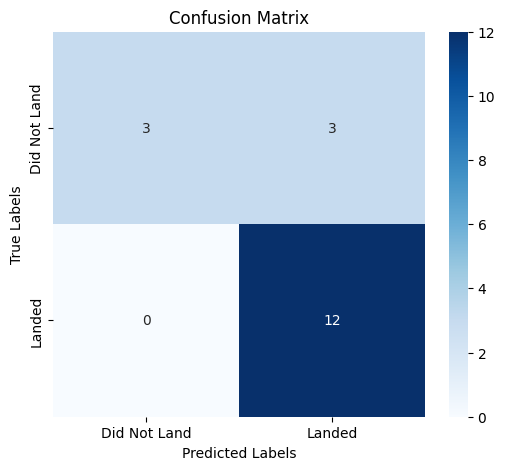

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


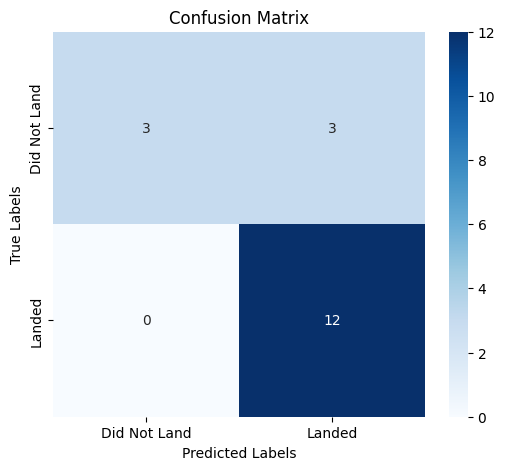

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8642857142857142


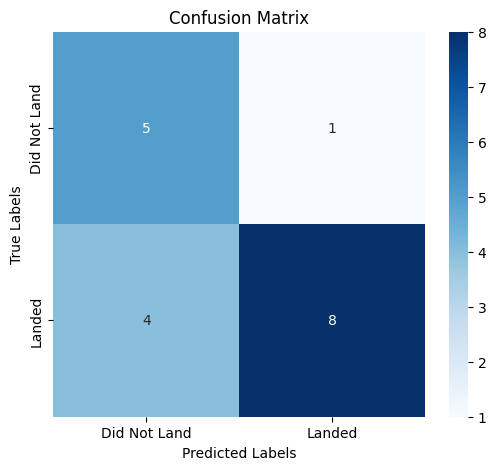

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


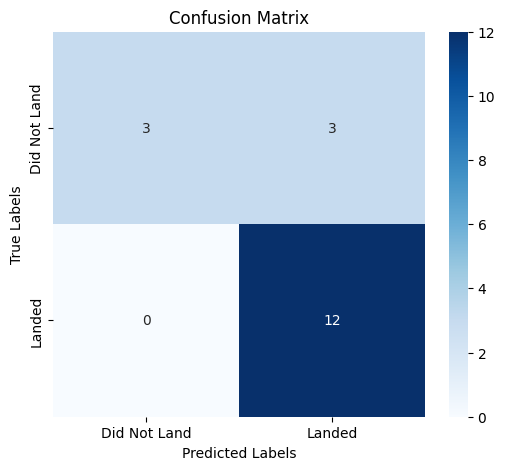

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV #Added GridSearchCV import
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import requests
import io

# Function to plot confusion matrix
def plot_confusion_matrix(y, y_predict):
    """This function plots the confusion matrix"""
    cm = confusion_matrix(y, y_predict)

    fig, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="d")

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Did Not Land', 'Landed'])
    ax.yaxis.set_ticklabels(['Did Not Land', 'Landed'])

    plt.show()

# Load datasets
def load_csv_from_url(url):
    """Downloads CSV file from URL and returns a Pandas DataFrame"""
    try:
        response = requests.get(url)
        response.raise_for_status()
        return pd.read_csv(io.StringIO(response.text))
    except requests.exceptions.RequestException as e:
        print(f"Error fetching {url}: {e}")
        return None

data = load_csv_from_url("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
X = load_csv_from_url("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv")

if data is not None and X is not None:
    # Convert 'Class' column to numpy array
    Y = data['Class'].to_numpy()

    # Standardize X
    scaler = preprocessing.StandardScaler()
    X = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

    print("Data successfully processed!")
else:
    print("Error: Could not load datasets.")

Y_test.shape

#Task 4: Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.
parameters = {'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

# Perform Grid Search with 10-fold cross-validation
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit the model
logreg_cv.fit(X_train, Y_train)


print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

# task 5:Calculate the accuracy on the test data using the method score:

yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#task 6:Create a support vector machine object then create a GridSearchCV object svm_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

#task7:Calculate the accuracy on the test data using the method score:

yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#task8:to create a decision tree
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

# Create GridSearchCV object for Decision Tree
tree_cv = GridSearchCV(tree, parameters, cv=10)
# Fit the GridSearchCV object
tree_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

#task9: calculate accuracy of score

yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#task10: fit the objective to parameters

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
KNN_cv = GridSearchCV(KNN, parameters, cv=10)
KNN_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ",KNN_cv.best_params_)
print("accuracy :",KNN_cv.best_score_)

# task11: to calculate score:

yhat = KNN_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

#task12: find the method performs best:

